# House Price Prediction Analysis
# DATA_606 Capstone in Data Science  - Chaojie Wang
## By Sathyam Chanumolu (GM58894)

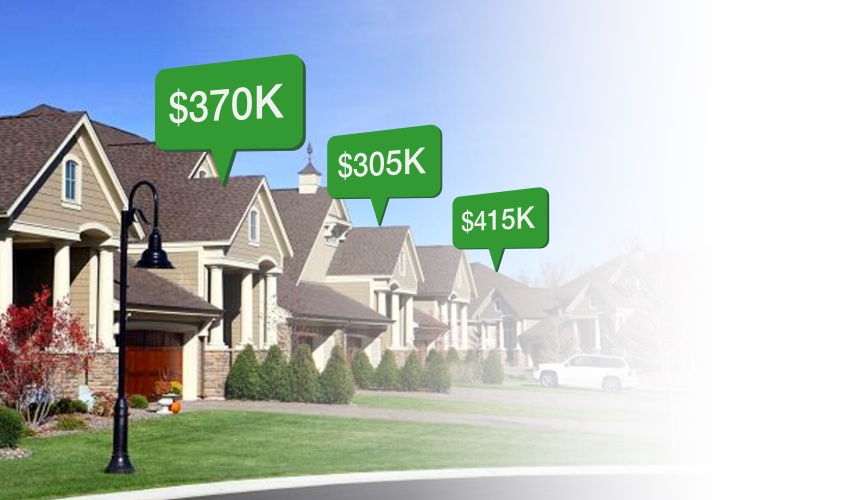

**Problem statement:**

Simply said, a house's worth goes beyond its location and size. Like the characteristics that make up a person, a knowledgeable individual would want to know all of the factors that contribute to a home's worth. For instance, if you want to sell a property but are unsure of the price you could receive, it must not be too low or too expensive. You often look for comparable homes in your community to determine your home's price, and then you try to estimate it using the information you have acquired.

**Objective**

Take advantage of all of the feature variables available below, use it to analyse and predict house prices.

|feature_name|feature_descriptions|
|-------------|-----------------|
|1. cid| a notation for a house|
|2. dayhours| Date house was sold|
|3. price| Price is prediction target|
|4. room_bed|Number of Bedrooms/House|
|5. room_bath| Number of bathrooms/bedrooms|
|6. living_measure| square footage of the home|
|7. lot_measure| square footage of the lot|
|8. ceil| Total floors (levels) in house|
|9. coast| House which has a view to a waterfront|
|10. sight| Has been viewed|
|11. condition| How good the condition is (Overall)|
|12. quality| grade given to the housing unit, based on grading system|
|13. ceil_measure| square footage of house apart from basement|
|14. basement_measure| square footage of the basement|
|15. yr_built| Built Year|
|16. yr_renovated| Year when house was renovated|
|17. zipcode| zip|
|18. lat| Latitude coordinate|
|19. long| Longitude coordinate|
|20. living_measure15| Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area|
|21. lot_measure15| lotSize area in 2015(implies-- some renovations)|
|22. furnished| Based on the quality of room|
|23. total_area| Measure of both living and lot|

**1. Import Libraries**

In [1]:
import random
import datetime
import warnings
import collections
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from collections import Counter
import matplotlib.pyplot as plt

from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

**2. Import Data**

In [2]:
## read data
DATA_PATH = 'innercity_house_price_details.xlsx'

df = pd.read_excel(DATA_PATH)
print(f"shape : {df.shape}")
df.head()

shape : (21613, 23)


,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3.876101e+09,20150427T000000,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,...,1250.0,1966.0,0.0,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,3.145600e+09,20150317T000000,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,...,0.0,1948.0,0.0,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,7.129303e+09,20140820T000000,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,...,0.0,1966.0,0.0,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,7.338220e+09,20141010T000000,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,...,0.0,2009.0,0.0,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,7.950301e+09,20150218T000000,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,...,0.0,1924.0,0.0,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0


In [3]:
df.iloc[:, 14:].head()

,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,1966.0,0.0,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,1948.0,0.0,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,1966.0,0.0,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,2009.0,0.0,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,1924.0,0.0,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0


**3. Data Understanding**

In [4]:
## get column names
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

**Columns present in the dataset indicates the house quality, condition, year of building, area, address etc.**

In [5]:
## getting basic information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  float64
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  float64
 16  zipcode           21613 non-null  float6

**Dataset has 21613 rows and 22 input columns, along with 1 output column which is price.**

In [6]:
## getting description of numerical features
df.describe().round(2).iloc[:,8:] 

,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,21612.00,21612.00,21613.00,21613.00,21613.00,21447.00,21584.00,21584.0
mean,1788.37,291.52,84.40,98077.94,47.56,1987.07,12766.54,0.2
std,828.10,442.58,401.68,53.51,0.14,685.52,27286.99,0.4
min,290.00,0.00,0.00,98001.00,47.16,399.00,651.00,0.0
25%,1190.00,0.00,0.00,98033.00,47.47,1490.00,5100.00,0.0
50%,1560.00,0.00,0.00,98065.00,47.57,1840.00,7620.00,0.0
75%,2210.00,560.00,0.00,98118.00,47.68,2360.00,10087.00,0.0
max,9410.00,4820.00,2015.00,98199.00,47.78,6210.00,871200.00,1.0


**From initial description of numerical features we can say that dataset has outliers present in it.**

In [7]:
## checking for null values
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

**Out of 23, 16 features has null values. The least null value present in the dataset is 1, whereas the maximum present as 166 which is not even 1% of the given dataset.**

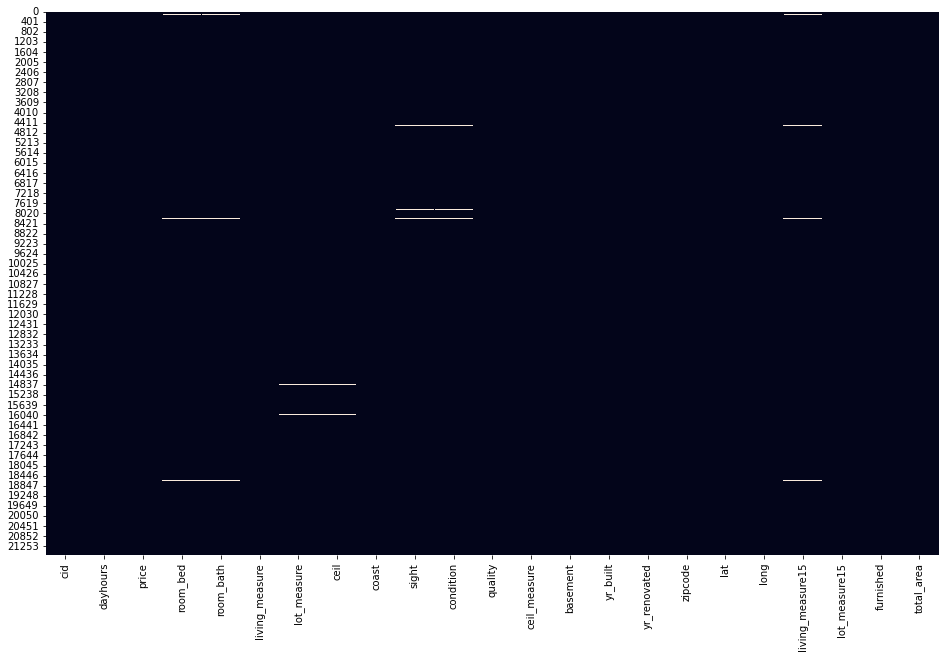

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(),cbar=False)

In [9]:
df.dtypes

cid                 float64
dayhours             object
price               float64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated        float64
zipcode             float64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

In [10]:
## checking for duplicate values
df.duplicated().sum()

0

**There are no duplicate rows present in the dataset.**

**4. Null Value Imputation**

In [11]:
## some features has $ sign present in it
col_with_dollar_sign = [col for col in df.columns if df[df[col] == "$"][col].count() > 0]
print(f"column with $ sign : {col_with_dollar_sign}")
print("example --")
df["coast"].value_counts()

column with $ sign : ['ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area']
example --


0.0    21421
1.0      161
$         30
Name: coast, dtype: int64

In [12]:
## as this value not adding any value to the column treating it as a null value
for col in col_with_dollar_sign:
    df[col] = df[col].replace("$", np.nan)

In [13]:
## null value count
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [14]:
continuous_columns = ["living_measure", "lot_measure", "ceil_measure", "basement", "living_measure15", "lot_measure15", "total_area"]
categorical_columns = ["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "yr_built", "yr_renovated", "furnished"]
lat_long_columns = ["lat", "long"]

**segregating NOIR columns and continuous columns**

In [15]:
## imputing null values for categorical columns using mode values present in it
categorical_null_columns = ["room_bed", "room_bath", "sight", "ceil", "coast", "condition", "quality", "yr_built", "furnished"]
for cat_col in categorical_null_columns:
    mode_val = df[cat_col].mode()[0]
    print(f"column name : {cat_col}, mode value : {mode_val}")
    df[cat_col] = df[cat_col].fillna(mode_val)

column name : room_bed, mode value : 3.0
column name : room_bath, mode value : 2.5
column name : sight, mode value : 0.0
column name : ceil, mode value : 1.0
column name : coast, mode value : 0.0
column name : condition, mode value : 3.0
column name : quality, mode value : 7.0
column name : yr_built, mode value : 2014.0
column name : furnished, mode value : 0.0


In [16]:
## imputing null values for continuous columns using mean value present in it
coninuous_null_columns = ["living_measure", "lot_measure", "ceil_measure", "basement", "ceil_measure", "basement", "living_measure15",
                          "lot_measure15", "total_area", "long"]
                    
for num_col in coninuous_null_columns:
    mean_val = df[num_col].mean()
    print(f"column name : {num_col}, mean value : {mean_val:.0f}")
    if num_col == "long":
        df[num_col] = df[num_col].fillna(mean_val)
    else:
        df[num_col] = df[num_col].fillna(int(mean_val))

column name : living_measure, mean value : 2080
column name : lot_measure, mean value : 15105
column name : ceil_measure, mean value : 1788
column name : basement, mean value : 292
column name : ceil_measure, mean value : 1788
column name : basement, mean value : 292
column name : living_measure15, mean value : 1987
column name : lot_measure15, mean value : 12767
column name : total_area, mean value : 17192
column name : long, mean value : -122


In [17]:
df.isnull().sum() ## after imputation null value analysis

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

**5. Exploratory Data Analysis - PRICE (output column)**

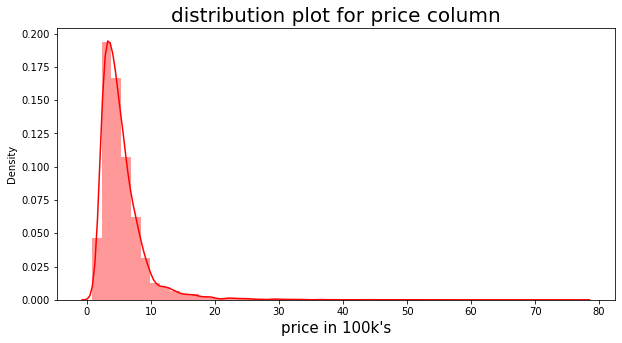

In [18]:
plt.figure(figsize=(10,5))
sns.distplot((df["price"]/100000), color="red")
plt.title("distribution plot for price column", fontsize=20)
plt.xlabel("price in 100k's", fontsize=15)
plt.show()

In [19]:
## checking for skewness and kurtosis
print(f"skewness -> {df['price'].skew():.4f}")
print(f"kurtosis -> {df['price'].kurt():.4f}")

skewness -> 4.0217
kurtosis -> 34.5224


**The price(output) column is right skewed and a longer tail.**

In [20]:
## perfroming central limit theorem to check whether the column sample means follow normality or not
def CLT(data, total_samples, rows_in_each_sample):
    """
    This function generates samples from the given column and perfroms CLT.
    """
    ## converting to array 
    data = np.array(data)
    ## getting rows for each sample
    index_list = [random.sample(range(0, len(data)), rows_in_each_sample) for i in range(total_samples)]
    ## generating sample means
    sample_means = [data[idxes].mean() for idxes in index_list]
    return sample_means

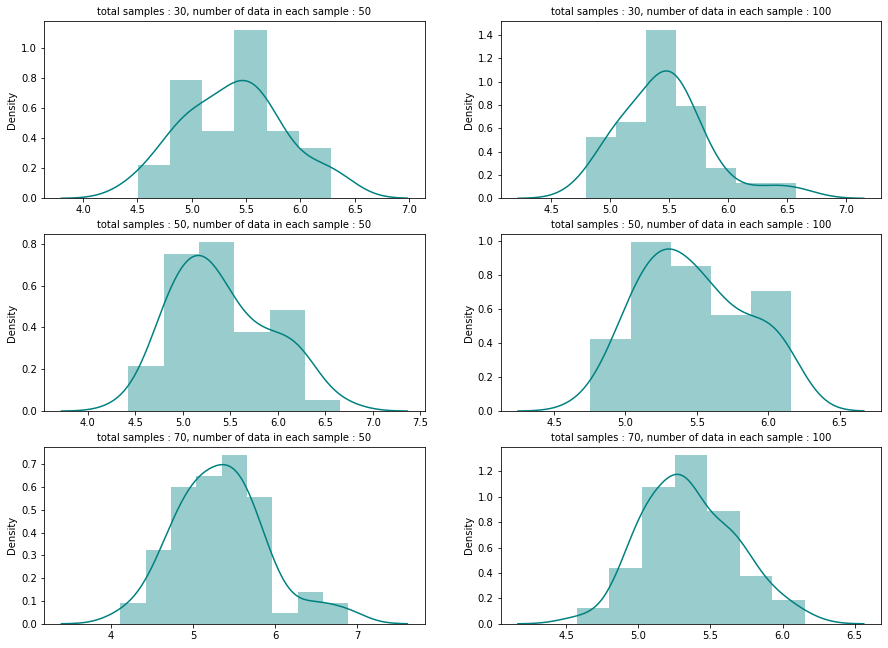

In [21]:
total_samples = [30, 30, 50, 50, 70, 70]
rows_in_each_sample = [50, 100, 50, 100, 50, 100]
fig = plt.figure(figsize=(15,15))
for idx, (sample, row_sample) in enumerate(zip(total_samples, rows_in_each_sample)):
    plt.subplot(4, 2, idx+1)
    sns.distplot(CLT(df["price"]/100000, sample, row_sample), color = "teal")
    plt.title(f"total samples : {sample}, number of data in each sample : {row_sample}", fontsize=10)
plt.show()

**From above distribution plots of mean values of samples we can say that CLT doesn't hold true.**

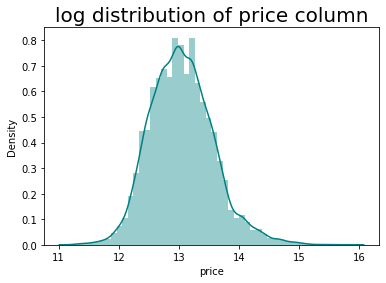

In [22]:
## checking for log transformation of price column to understand whether it will follow normality or not
## also checking for QQ plot
plot = sns.distplot(np.log1p(df["price"]), color="teal")
plt.title("log distribution of price column", fontsize=20)
plt.show()

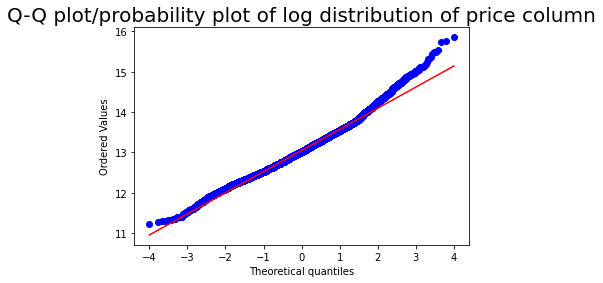

In [23]:
stats.probplot(np.log1p(df["price"]), plot=plt)
plt.title("Q-Q plot/probability plot of log distribution of price column", fontsize=20)
plt.show()

**Q-Q plot says that the log transformation of price column doesn't follow normality completely. The tail towards both end are curvy and not in line.**

**6. Univariate, Bivariate, and Multivariate Analysis - EDA(all features)**

**6.1 Univariate analysis - continuous data**

In [24]:
def dist_plot_agg(data, columns, size=(15,5), num_row=1, num_col=1):
    """
    This function is to plot distribution pltiot for numerical features.
    """
    figure = plt.figure(figsize=size)
    for idx, col in enumerate(columns):
        plt.subplot(num_row, num_col, idx+1)
        plot = sns.distplot(data[col])
    return plt.show()

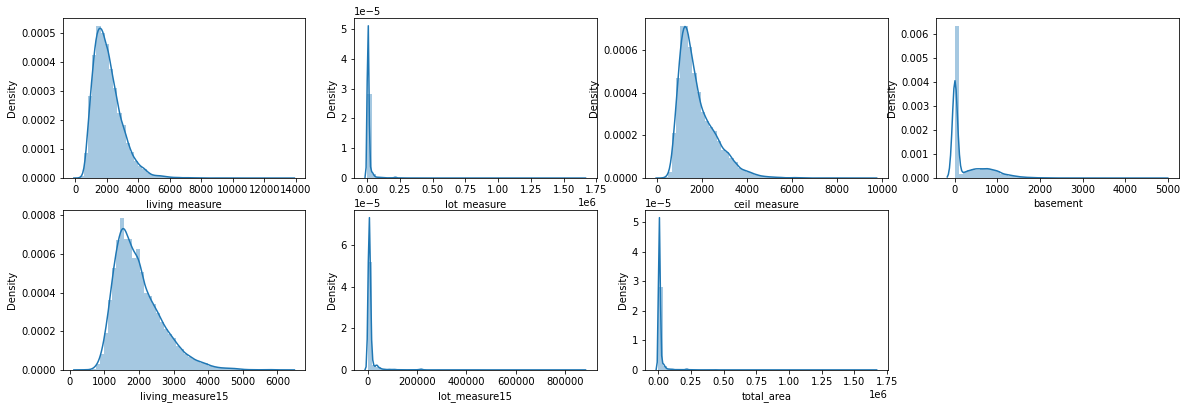

In [25]:
dist_plot_agg(df, continuous_columns, size=(20,10), num_row=3, num_col=4)

In [26]:
## checking for skewness and kurtosis
for col in continuous_columns:
    print(f"skewness : {df[col].skew():.4f}, kurtosis : {df[col].kurt():.4f}, column : {col}")

skewness : 1.4731, kurtosis : 5.2533, column : living_measure
skewness : 13.0851, kurtosis : 286.0543, column : lot_measure
skewness : 1.4468, kurtosis : 3.4027, column : ceil_measure
skewness : 1.5779, kurtosis : 2.7156, column : basement
skewness : 1.1123, kurtosis : 1.6346, column : living_measure15
skewness : 9.5255, kurtosis : 151.4301, column : lot_measure15
skewness : 12.9749, kurtosis : 281.8961, column : total_area


**All the continuous features are right-skewed**

**lot_measure, lot_measure15 and total_area has big skewness**

**6.2 Furnished**

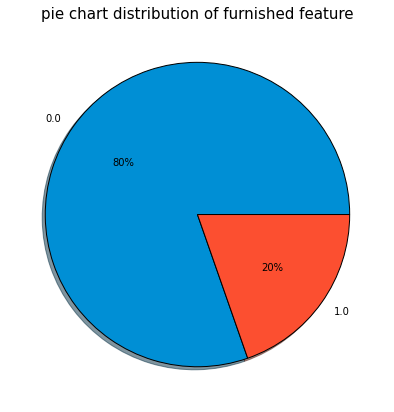

In [27]:
data = df["furnished"].value_counts().to_dict()
plt.figure(figsize=(7,7))
plt.pie(data.values(), labels = data.keys(), wedgeprops={'edgecolor': 'black'}, colors = ['#008fd5', '#fc4f30'], autopct='%.0f%%', shadow=True)
plt.title("pie chart distribution of furnished feature", fontsize=15)
plt.show()

**Funrished column has a majority of the data without furnished.**

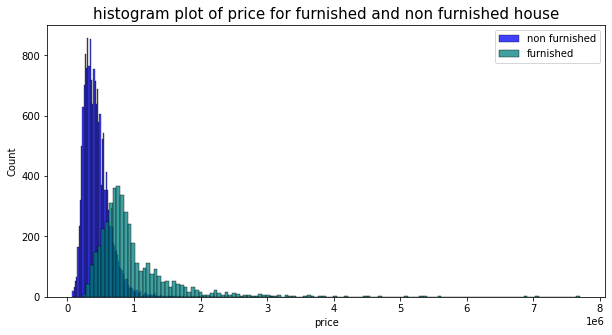

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["furnished"] == 0]["price"], color="blue")
sns.histplot(df[df["furnished"] == 1]["price"], color="teal")
plt.legend(["non furnished", "furnished"])
plt.title("histogram plot of price for furnished and non furnished house", fontsize=15)
plt.show()

**There is a clear seggregation, as furnished has higher price as compared to the non-furnished house.**

**6.3 Coast**

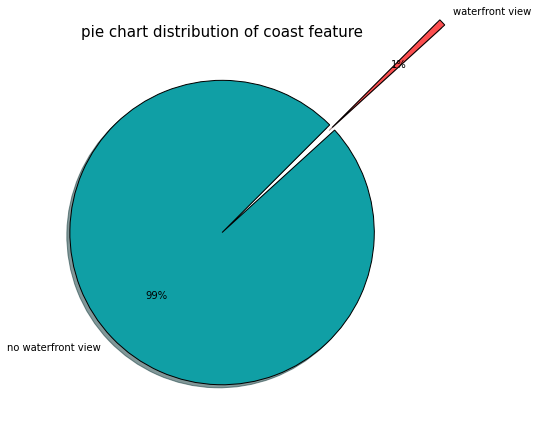

In [29]:
data = df["coast"].value_counts().to_dict()
plt.figure(figsize=(7,7))
plt.pie(data.values(), labels = ["no waterfront view", "waterfront view"], 
        wedgeprops={'edgecolor': 'black'}, 
        colors = ['#109fa5', '#fc4f50'], autopct='%.0f%%', shadow=True, explode=(0, 1), startangle=45)

plt.title("pie chart distribution of coast feature", fontsize=15)
plt.show()

**Only 1% of the data has waterfront view.**

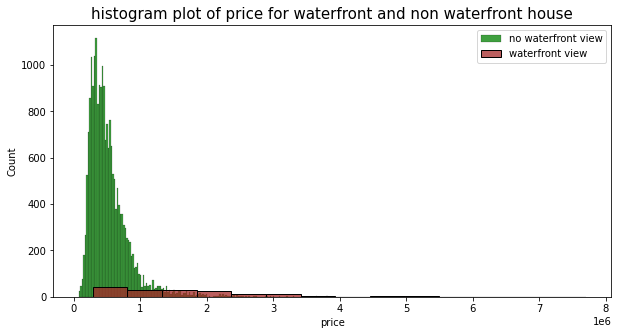

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["coast"] == 0]["price"], color="green")
sns.histplot(df[df["coast"] == 1]["price"], color="brown")
plt.legend(["no waterfront view", "waterfront view"])
plt.title("histogram plot of price for waterfront and non waterfront house", fontsize=15)
plt.show()

**House with waterfront view has higer price.**

**6.4 Categorical data box plot with price column**

In [31]:
def bivariate_with_output_analysis(data, columns, output_col, num_row=1, num_col=1, size=(15,5)):
    figure = plt.figure(figsize=size)
    for idx, col in enumerate(columns):
        plt.subplot(num_row, num_col, idx+1)
        plot = sns.boxplot(x=col, y=output_col, data=data)
        plt.title(col, fontsize=15)
        plt.xlabel("")
    return plt.show()

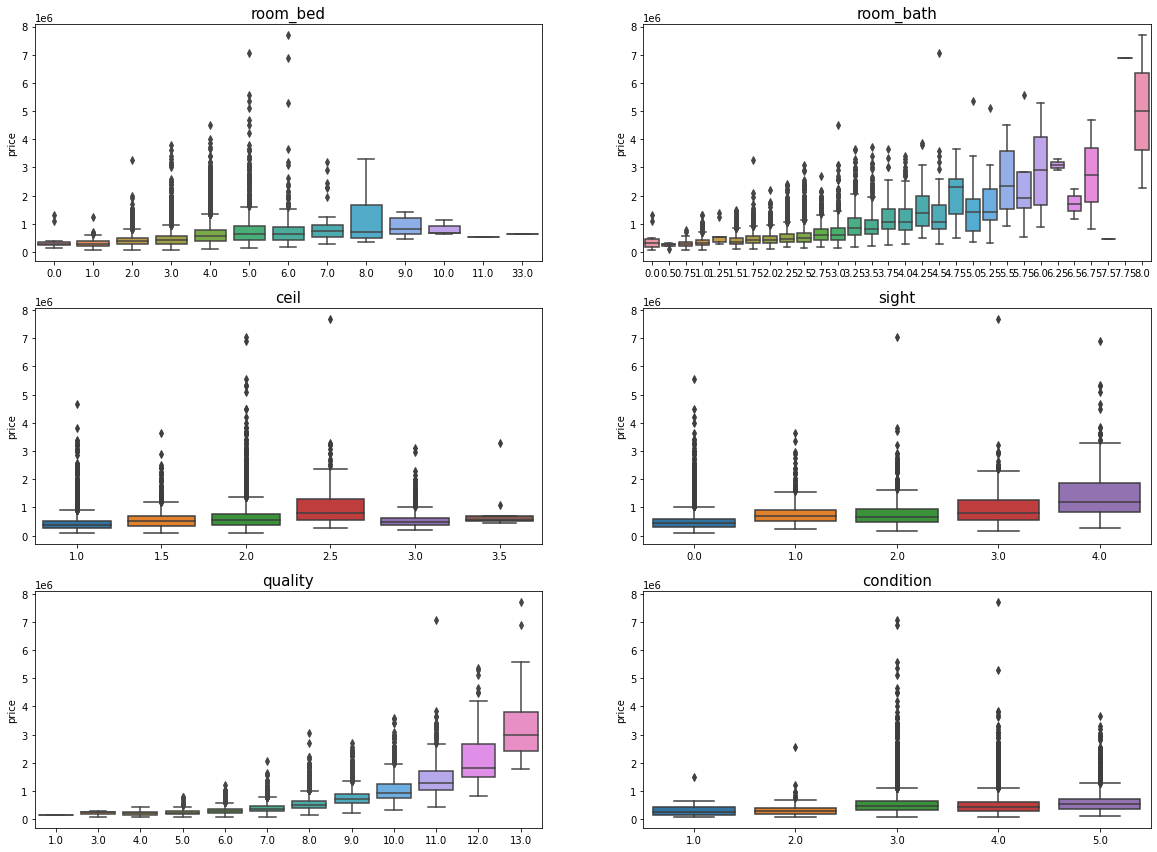

In [32]:
bivariate_with_output_analysis(df, ["room_bed", "room_bath", "ceil", "sight", "quality", "condition"], 
                               "price", num_row=4, num_col=2, size=(20,20))

**There is a correlation of price column with the overall quality column. Other columns such as sight has some amount collinearity present with the price data. Number of bathroom present in one house can also increase the price in many cases. But overall condition, number of floors(ceil) doesn't have much impact to the price columns.**

**6.5 Is there any pattern between ceil and ceil measure ?**

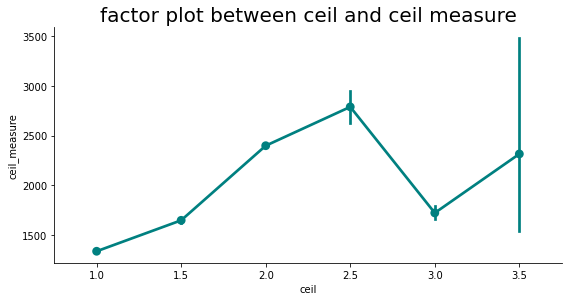

In [33]:
sns.factorplot(x='ceil', y='ceil_measure', data=df, size = 4, aspect = 2, color= "teal")
plt.title("factor plot between ceil and ceil measure", fontsize=20)
plt.show()

**There is no pattern present between total number of floors present in a house related to its measurement.**

**6.6 Basement**

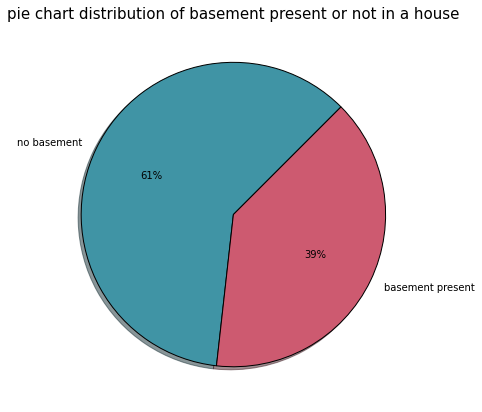

In [34]:
basement_data = df["basement"].apply(lambda x : 1 if x >0 else 0).value_counts().to_dict()
plt.figure(figsize=(7,7))
plt.pie(basement_data.values(), labels = ["no basement", "basement present"], 
        wedgeprops={'edgecolor': 'black'}, 
        colors = ['#4094a5', '#cd5a70'], autopct='%.0f%%', shadow=True, startangle=45)

plt.title("pie chart distribution of basement present or not in a house", fontsize=15)
plt.show()

**65% of the house has no basement present.**

**6.7 Does basement absence affects the price of the house?**

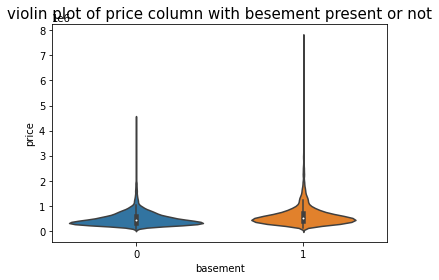

In [35]:
sns.violinplot(x=df["basement"].apply(lambda x : 1 if x >0 else 0), y="price", data=df)
plt.title("violin plot of price column with besement present or not", fontsize=15)
plt.show()

**The tail of violin plot is high for the house where basement present.Though majority of the house price is same for both houses where basement is present and not present.**

**6.8 Data distribution with house year of built**

In [36]:
print("oldest and newest year present in the dataset is :")
print(f'oldest year : {df["yr_built"].min()}, newest year : {df["yr_built"].max()}')

oldest and newest year present in the dataset is :
oldest year : 1900.0, newest year : 2015.0


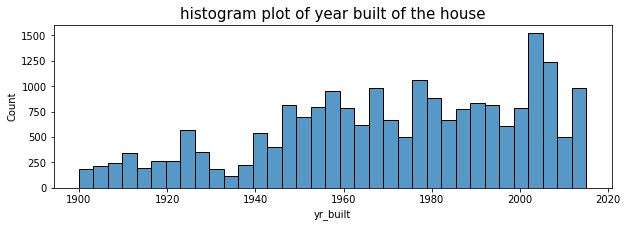

In [37]:
## create bins of year between 1925, 1950, 1975, 2000, above 2000
plt.figure(figsize=(10,3))
sns.histplot(df['yr_built'])
plt.title("histogram plot of year built of the house", fontsize=15)
plt.show()

**With the latest year the count of house data is also increasing in the dataset.**

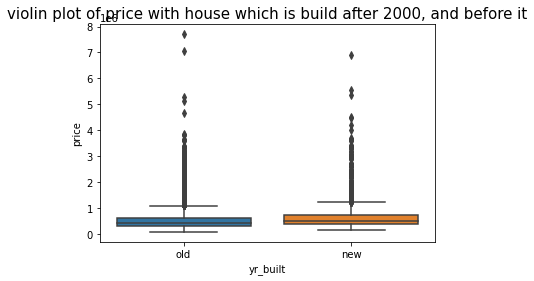

In [38]:
## check the price for the house built new
house_build_type = df['yr_built'].apply(lambda x : "new" if x > 1999 else "old")
sns.boxplot(x=house_build_type, y="price", data=df)
plt.title("violin plot of price with house which is build after 2000, and before it", fontsize=15)
plt.show()

**There is not much difference in house price which is built before 2000 and after it.**

**6.9 Price with house renovated or not**

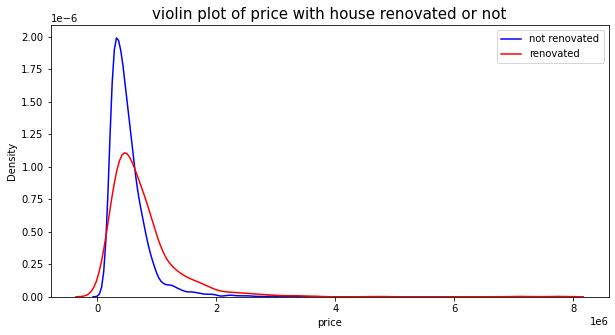

In [39]:
## check the price for the house renovated or not
df_temp = df.copy()
df_temp["yr_ren_yn"] = df['yr_renovated'].apply(lambda x : 1 if x > 0 else 0)
plt.figure(figsize=(10,5))
sns.distplot(df_temp[df_temp["yr_ren_yn"] == 0]["price"], color="blue", hist=None)
sns.distplot(df_temp[df_temp["yr_ren_yn"] == 1]["price"], color="red", hist=None)
plt.legend(["not renovated", "renovated"])
plt.title("violin plot of price with house renovated or not", fontsize=15)
plt.show()

**There is no impact in price to the house renovation.**

**6.10 Pairplots of coninuous variables with the price columns**

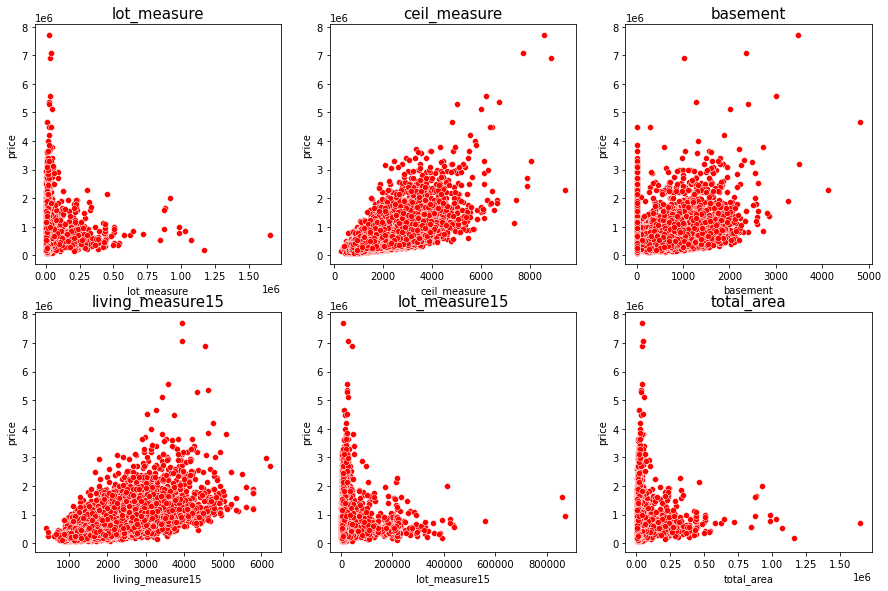

In [40]:
plt.figure(figsize=(15,15))
for idx, col in enumerate(continuous_columns[1:]):
    plt.subplot(3,3, idx+1)
    sns.scatterplot(df[col], df["price"], color = 'red')
    plt.title(col, fontsize=15)
plt.show()

**ceil_measure, and lost_measure15 has some correlation present with the output price column**

**6.11 Dayhours**

In [41]:
df_temp = df.copy()

## converting dayhour column into date time format
df_temp["dayhours"] = pd.to_datetime(df_temp["dayhours"])

## getting month and year code
df_temp["month"] = df_temp["dayhours"].dt.month
df_temp["year"] = df_temp["dayhours"].dt.year
df_temp["month_year"] = df_temp["year"].astype("string") + df_temp["month"].astype("string")

In [42]:
df_temp["dayhours"].sort_values()

17176   2014-05-02
16626   2014-05-02
15422   2014-05-02
6337    2014-05-02
13352   2014-05-02
           ...    
13258   2015-05-14
11681   2015-05-14
8433    2015-05-15
651     2015-05-24
15121   2015-05-27
Name: dayhours, Length: 21613, dtype: datetime64[ns]

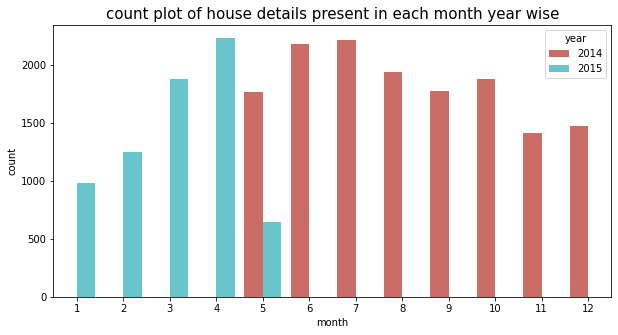

In [43]:
## count plot of data points from month and year
plt.figure(figsize=(10,5))
sns.countplot(x="month", hue="year", data=df_temp, palette = "hls")
plt.title("count plot of house details present in each month year wise", fontsize=15)
plt.show()

**Most of the house data present in the 2015 Apr and 2014 july month.**

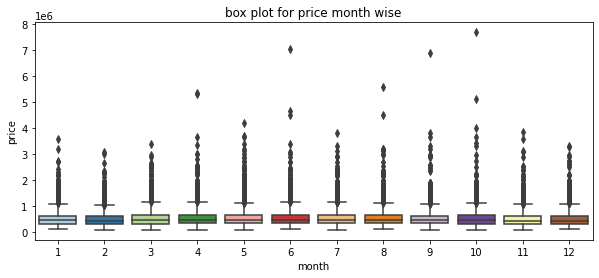

In [44]:
## let's see any trend present in the house price in the following months
plt.figure(figsize=(10,4))
sns.boxplot(data=df_temp, x = "month", y = "price", palette = "Paired")
plt.title("box plot for price month wise")
plt.show()

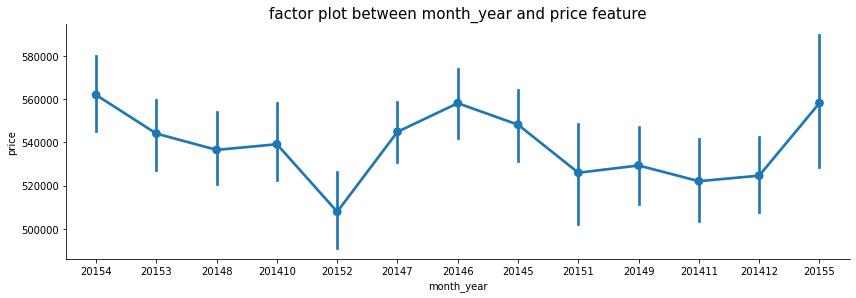

In [45]:
sns.factorplot(x="month_year",y='price',data=df_temp, size=4, aspect=3)
plt.title("factor plot between month_year and price feature", fontsize=15)
plt.show()

**There is no trend present in the house price in various months.**

**6.12 zipcodes**


*using external file form the below source to get the state and county name from the dataset*

https://simplemaps.com/data/us-zips

In [46]:
zip_df = pd.read_excel("uszips.xlsx")
print(zip_df.columns)

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta',
       'parent_zcta', 'population', 'density', 'county_fips', 'county_name',
       'county_weights', 'county_names_all', 'county_fips_all', 'imprecise',
       'military', 'timezone'],
      dtype='object')


In [47]:
zipcodes = df[["zipcode", "price"]].astype("int")
zip_merge = pd.merge(zipcodes, zip_df[["zip", "city", "state_name", "county_name", "density"]],
                     left_on = "zipcode", right_on = "zip", how='left')
zip_merge.head()

,zipcode,price,zip,city,state_name,county_name,density
0,98034,600000,98034,Kirkland,Washington,King,1853.0
1,98118,190000,98118,Seattle,Washington,King,3037.8
2,98118,735000,98118,Seattle,Washington,King,3037.8
3,98002,257000,98002,Auburn,Washington,King,1797.1
4,98118,450000,98118,Seattle,Washington,King,3037.8


In [48]:
print(f'The data belongs only to the US state {zip_merge["state_name"].value_counts().index[0]} and county {zip_merge["county_name"].value_counts().index[0]}.')

The data belongs only to the US state Washington and county King.


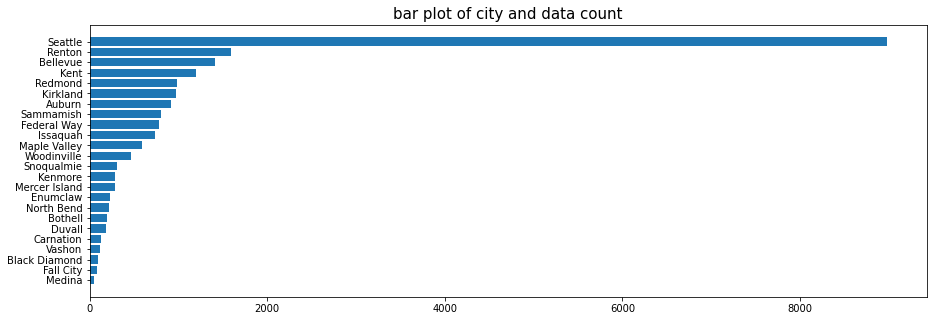

In [49]:
## count plot of house data for different cities 
plt.figure(figsize=(15,5))
city_data = collections.OrderedDict(zip_merge["city"].value_counts().to_dict())
plt.barh(list(city_data.keys())[::-1], list(city_data.values())[::-1])
plt.title("bar plot of city and data count", fontsize=15)
plt.show()

**Most of the data present in the dataset belongs to Seattle.**

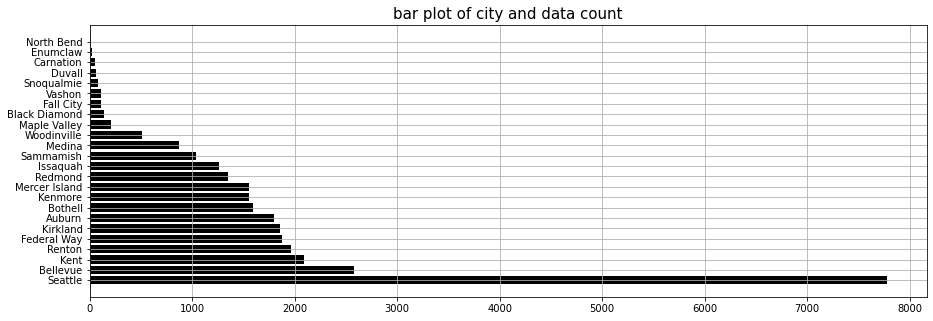

In [50]:
x = zip_merge[["city", "density"]].drop_duplicates()
density_data = x.sort_values(by = "density", ascending=False)

plt.figure(figsize=(15,5))
plt.barh(density_data["city"], density_data["density"], color="black")
plt.grid()
plt.title("bar plot of city and data count", fontsize=15)
plt.show()

**The density of the seattle city is very high, also most of the data belongs to the same city itself.**

**6.13 Is house price related to the density of the city?**

In [51]:
df_temp = pd.merge(df, zip_df, left_on = "zipcode", right_on = "zip") ## merging uszip file with the original data
df_temp = df_temp.sort_values(by= ['city', "density"])

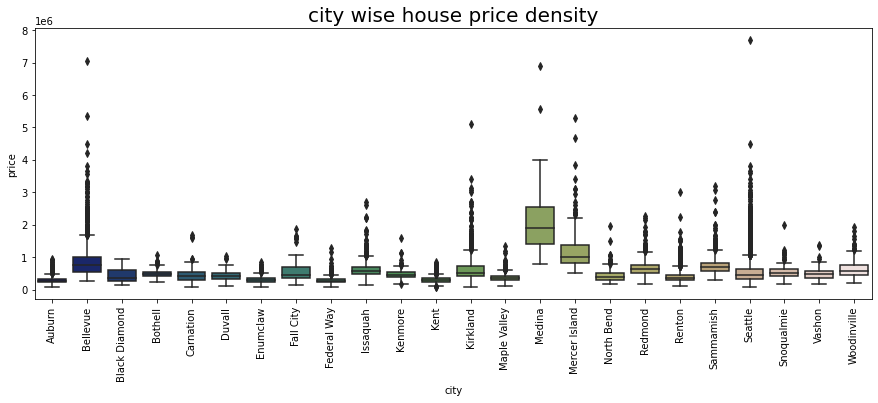

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_temp, y="price", x="city", palette = "gist_earth")
plt.xticks(rotation=90)
plt.title("city wise house price density", fontsize=20)
plt.show()

**Medina city has house with higher values.It may be due to most of posh house will be there. Let's see the house quality in that city.**

In [53]:
df_temp[df_temp["city"] == "Medina"]["quality"].value_counts()

9.0     13
11.0    11
8.0      8
10.0     6
7.0      6
12.0     4
13.0     2
Name: quality, dtype: int64

**The above count shows that Medina has only quality house present.**

**7. Outlier Analysis**

In [54]:
def outlier_detection(data, columns, size=(15,5), num_row = 1, num_col =1):
    """
    This function is to plot box plot for numerical features.
    """
    figure = plt.figure(figsize=size)
    for idx, col in enumerate(columns):
        plt.subplot(num_row, num_col, idx+1)
        plot = sns.boxplot(data[col])
        plt.title(col, fontsize=15)
        plt.xlabel("")
    return plt.show()

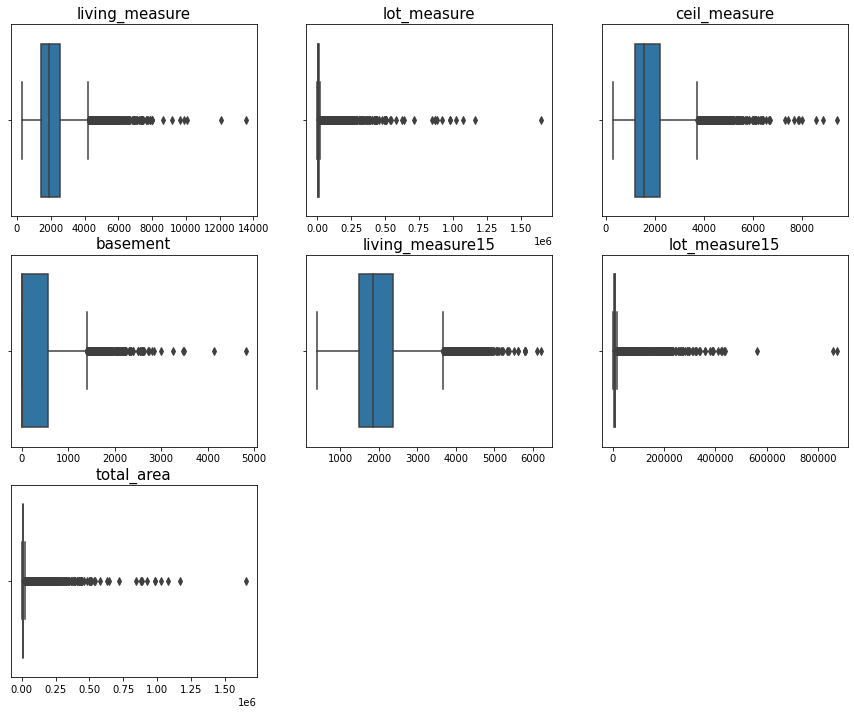

In [55]:
outlier_detection(df, continuous_columns, size=(15,12), num_row = 3, num_col =3)

**From initial analysis of box plot we can say that there are outliers present in the dataset for each contnuous columns.**

**7.1 Outlier between living measure and price**

In [56]:
def outlier_using_DBSCAN(data, input_col, output_col, eps=2, min_samples=3):
    ## using dbscan method to locate the outliers present in the dataset
    from sklearn.cluster import DBSCAN
    df_scaled = pd.DataFrame(StandardScaler().fit_transform(data[[input_col, output_col]]), columns=[input_col, output_col])
    ## fitting DBSCAN model 
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
    ## creating a temp dataframe to see the labels
    df_tmp = pd.concat((df_scaled, pd.DataFrame(model.labels_, columns=['label'])), axis=1)

    ## plotting data
    sns.scatterplot(df[input_col], df[output_col], color="blue")
    sns.scatterplot(df.iloc[df_tmp[df_tmp["label"] == -1].index][input_col], 
                    df.iloc[df_tmp[df_tmp["label"] == -1].index].price, color='green', s=300, alpha=.6)
    plt.title("outlier detection using DBSCAN clustering", fontsize=20)
    plt.show()

    return df_tmp

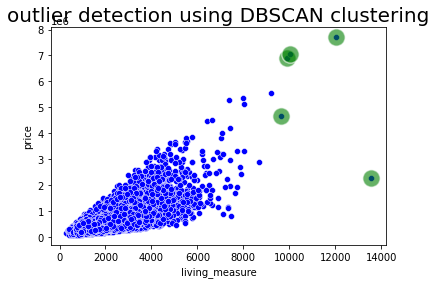

In [57]:
df_tmp = outlier_using_DBSCAN(df, "living_measure", "price", eps=2, min_samples=3)

## getting index to remove data in future
living_measure_outliers_index = df.iloc[df_tmp[df_tmp["label"] != -1].index]

**As we can see above using DBSCAN method we have detected 5 outliers.**

**7.2 Outlier analysis between total area and price**

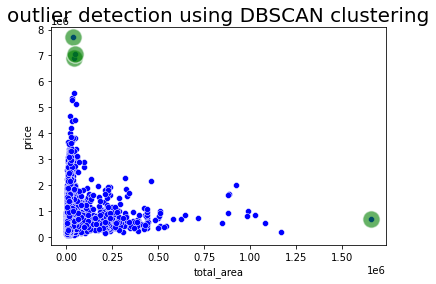

In [58]:
df_tmp1 = outlier_using_DBSCAN(df, "total_area", "price", eps=3, min_samples=5)

## getting index to remove data in future
area_outliers_index = df.iloc[df_tmp1[df_tmp1["label"] != -1].index]

**8. Correlation plot**

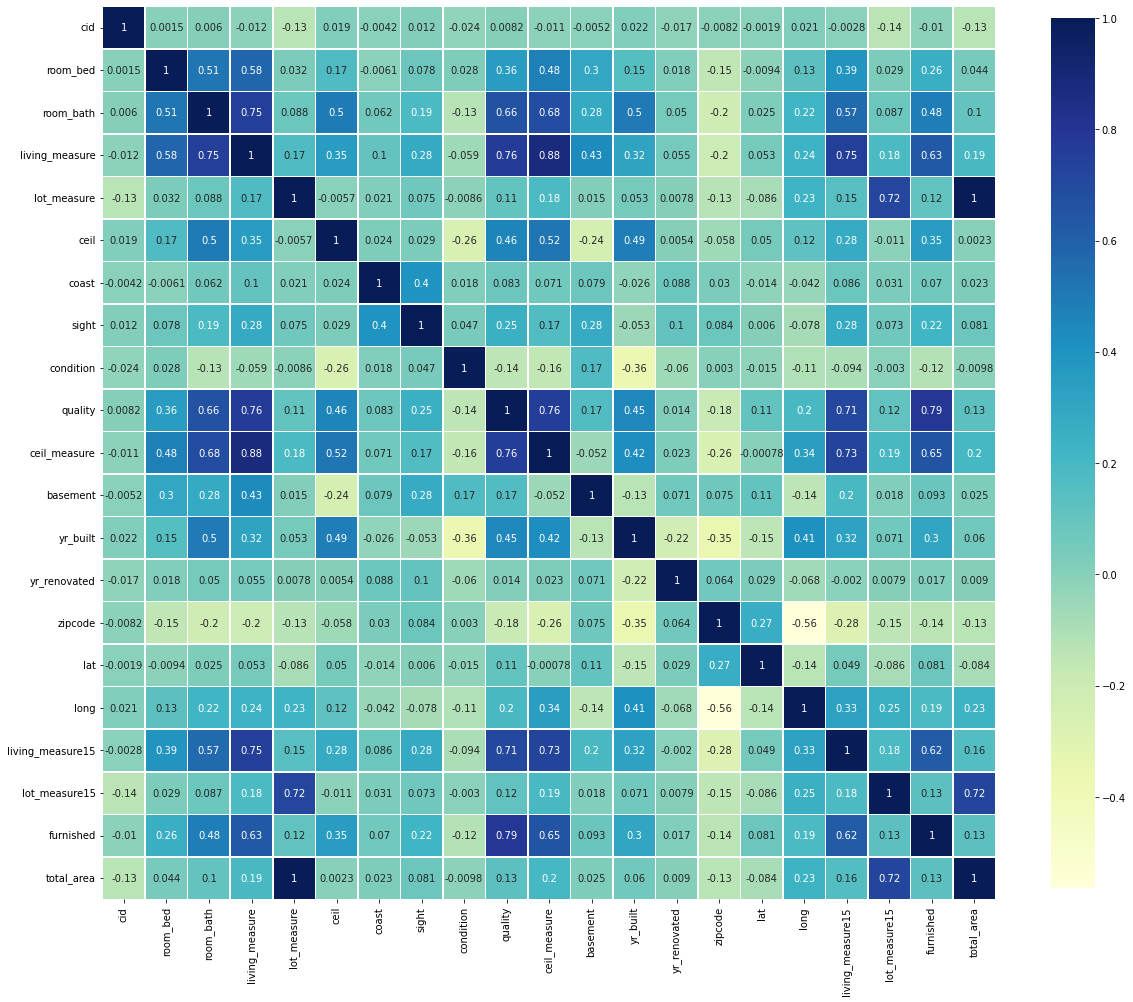

In [59]:
fig = plt.figure(figsize=(20,20)) ## setting up figure size

## heatmap for correation analysis
plot = sns.heatmap(df.drop(columns = "price").corr(), square = True, linewidths = .5, cbar_kws = {"shrink":0.8}, 
                   annot = True, cmap = 'YlGnBu') 

**My target column is price. From this heatmap the potential features for machine learning are living_measure, quality, ceil_measure, living_measure15, furnished etc.,**

In [60]:
## source code : - https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [61]:
corr_data = get_top_abs_correlations(df.drop(columns = "price").corr(), n=15)
corr_data

lot_measure       total_area          0.999743
quality           furnished           0.964237
living_measure    living_measure15    0.944316
quality           ceil_measure        0.943758
lot_measure15     total_area          0.943087
lot_measure       lot_measure15       0.941916
quality           living_measure15    0.934901
ceil_measure      living_measure15    0.933610
room_bath         living_measure      0.931484
living_measure    quality             0.930848
                  ceil_measure        0.930738
room_bath         ceil_measure        0.910109
                  quality             0.909555
ceil_measure      furnished           0.902089
living_measure15  furnished           0.901696
dtype: float64

From the above redundent pair of input features we can see that 

- lot_measure , lot_measure15 and total_area has correlation.
- most of the features such as furnished, ceil_measure, quality also correlated with each other and can make the input data redundent. 

In [62]:
## getting all the features in high correlation
features = [val[0] for val in corr_data.index]
features.extend([val[1] for val in corr_data.index])
Counter(features).most_common()

[('quality', 5),
 ('ceil_measure', 5),
 ('living_measure', 4),
 ('living_measure15', 4),
 ('room_bath', 3),
 ('furnished', 3),
 ('lot_measure', 2),
 ('lot_measure15', 2),
 ('total_area', 2)]

**9. Correlation plot with output**

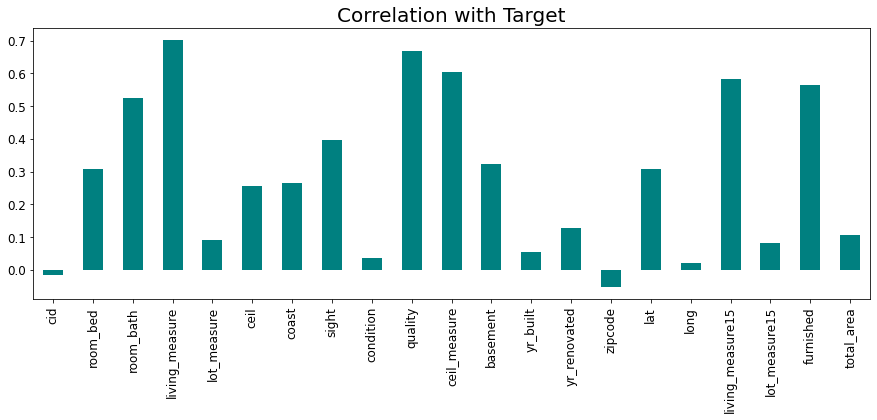

In [63]:
## checking correation with output data
plot = df.drop(columns = "price").corrwith(df["price"]).plot.bar(figsize = (15, 5), fontsize = 12, rot = 90, color = "teal")
plt.title('Correlation with Target', fontsize = 20)
plt.show()

**living measure has the highest correlation with the output which is more than 0.7.**

**10. Feature Engineering**

In [64]:
df1 = pd.merge(df[["zipcode", "price"]], zip_df, left_on = "zipcode", 
               right_on = "zip") ## merging uszip file with the original data

## selecting density and city columns to the main dataset
df["city"] = df1["city"]
df["density"] = df1["density"]

In [65]:
city_dict = dict()
for i, j in zip(range(len(df["city"].unique())), sorted(df["city"].unique())):
    city_dict[j] = i
df["city"] = df["city"].map(city_dict)

In [66]:
## creating some binary features
df["basement_binary"] = df["basement"].apply(lambda x : 1 if x >0 else 0)
df["renovated"] = df['yr_renovated'].apply(lambda x : 1 if x > 0 else 0)

In [67]:
## converting year build column into bins
data = []
for val in df["yr_built"].values:
    if val <= 1925:
        data.append(0)
    elif ((val > 1925) and (val <= 1950)):
        data.append(1)
    elif ((val > 1950) and (val <= 1975)):
        data.append(2)
    elif ((val > 1975) and (val <= 2000)):
        data.append(3)  
    elif (val > 2000):
        data.append(4)

df["yr_build_group"] = data

In [68]:
## adding total floors, bathroom, and bed in a hourse
df["total_room"] = df["room_bed"] + df["room_bath"] + df["ceil"]

**11. Feature Selection**

In [69]:
## remove correlated features which may affect the model as it is not adding any information
## selecting total_area to remove as it is almost 100% correalted with living_measure and living_measure has a higher corr as comapred to total_area
## removing living_measure15 as it is highly correlated with 4 other features and has a low correlation with the output data
corr_col =  ["total_area", "living_measure15"]

## removing datehour column also as the month and year not adding any importance to the model
datetime_cl = ["dayhours"]

## removing yr_renovated and basement as binary column already created
used_col = ["basement", "yr_renovated", "yr_built"]

## removing zip code as already used to get city and density
area_col = ["zipcode"]

## adhoc columns
adhoc_col = ["cid"]

## getting all columns which need to be dropped
drop_list = adhoc_col + area_col + used_col + datetime_cl + corr_col

## dropping outliers detected from living_measure and price plot
df = df.iloc[living_measure_outliers_index.index,:]

## dropped columns
df_selected = df.copy()
df_selected = df_selected.drop(columns = drop_list)

In [70]:
## new shape of the dataset
print(f"shape : {df_selected.shape}")

shape : (21608, 21)


**12. Data Preprocessing**

In [71]:
## converting data into categorical columns
final_cat_cols = ['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'furnished',
                  'condition', 'quality', 'city', 'basement_binary', 'renovated',
                  'total_room', 'yr_build_group']
for col in final_cat_cols:
    print(f"converting column : {col}")
    df_selected[col] = df_selected[col].astype("category")

## seggregating into one hot encoded, ordinal encoded columns
one_hot = ['coast', 'furnished', 'basement_binary', 'renovated', 'city']
ordinal = ['room_bed', 'room_bath', 'ceil', 'sight', 'condition', 'quality',
           'total_room']

## numerical columns
final_num_cols = ['living_measure', 'lot_measure', 'ceil_measure', 'lat', 'long',
                  'lot_measure15', 'density']

converting column : room_bed
converting column : room_bath
converting column : ceil
converting column : coast
converting column : sight
converting column : furnished
converting column : condition
converting column : quality
converting column : city
converting column : basement_binary
converting column : renovated
converting column : total_room
converting column : yr_build_group


**13. Splitting data**

In [72]:
y = df_selected["price"]
X = df_selected.drop(columns = "price")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17286, 20), (4322, 20), (17286,), (4322,))

In [73]:
## reshaping output
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17286, 20), (4322, 20), (17286, 1), (4322, 1))

**14. Data Encoding**

In [74]:
## copy datasets
xtrain = x_train.copy()
xtest = x_test.copy()

## one hot encoding 
for idx, col in enumerate(one_hot):
    enc = OneHotEncoder()
    data_tr = enc.fit_transform(xtrain[[col]]).toarray()
    data_te = enc.transform(xtest[[col]]).toarray()
    for idx, val in enumerate(sorted(xtrain[col].unique())):
        xtrain[col + "_" + str(val).lower()] = data_tr[:,idx]
        xtest[col + "_" + str(val).lower()] = data_te[:,idx]
    xtrain = xtrain.drop(columns = col)
    xtest = xtest.drop(columns = col)

In [75]:
## encoding output columns
enc_output = StandardScaler()
ytrain = enc_output.fit_transform(y_train.reshape(-1,1))
ytest = enc_output.transform(y_test.reshape(-1,1))

In [76]:
## copy datasets
xtrain1 = xtrain.copy()
xtest1 = xtest.copy()

## standard scaling all the features
for col in xtrain1.columns:
    enc = StandardScaler()
    xtrain1[col] = enc.fit_transform(xtrain1[[col]])
    xtest1[col] = enc.transform(xtest1[[col]])

**15. Select K-Best method**

In [77]:
## selected features
print(f"The total number of features generated at the end is {xtrain.shape[1]}.")
print("Let's select top 15 features for model building using SelectKBest Method.")

The total number of features generated at the end is 47.
Let's select top 15 features for model building using SelectKBest Method.


In [78]:
##using select K-best method to select features which is based on univariate statistical test
from sklearn.feature_selection import SelectKBest, mutual_info_regression
selector = SelectKBest(mutual_info_regression, k = 15)
selector.fit(xtrain1, ytrain)

selected_features = xtrain.columns[selector.get_support()]
print("Selected features are : ")
print(selected_features)

Selected features are : 
Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'sight', 'quality', 'ceil_measure', 'lat', 'long', 'lot_measure15',
       'yr_build_group', 'total_room', 'furnished_0.0', 'furnished_1.0'],
      dtype='object')


In [79]:
## selecting features generated from SelectKBest
xtrain_selected = xtrain[selected_features]
xtest_selected = xtest[selected_features]

In [80]:
## creating pipeline
col_transform = ColumnTransformer([("num_transform", StandardScaler(), selected_features)])

**16. Model Building using features selected from Select K-Best Method**

**16.1 K-Neighbors Regressor**

In [81]:
## creating model pipeline
model_combined = make_pipeline(col_transform, KNeighborsRegressor()) ## combining model

model_optimal = GridSearchCV(model_combined, {'kneighborsregressor__n_neighbors': [i for i in range(1,22)]},  
                             verbose = 2, cv = 3, n_jobs = -1, scoring = "r2")
model_optimal.fit(xtrain_selected, ytrain)

print(f"The optimal K for the dataset is {model_optimal.best_params_['kneighborsregressor__n_neighbors']}.")

best_model = model_optimal.best_estimator_ ## getting best model

Fitting 3 folds for each of 21 candidates, totalling 63 fits
The optimal K for the dataset is 6.


In [82]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model.predict(xtrain_selected))
ypred_te = enc_output.inverse_transform(best_model.predict(xtest_selected))

## creating output metrics
knn_metrics = pd.DataFrame({"Model" : "KNeighbourRegressor",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})
knn_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,KNeighbourRegressor,75559.204819,92331.074117,1.899522e+10,3.015440e+10,0.138583,0.170696,0.853361,0.750926


**16.2 Ridge Regression**

In [83]:
## creating model pipeline
from sklearn.linear_model import Ridge

model_combined = make_pipeline(col_transform, Ridge()) ## combining model

model_optimal = GridSearchCV(model_combined, {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},  
                             verbose = 2, cv = 3, n_jobs = -1, scoring = "r2")
model_optimal.fit(xtrain_selected, ytrain)

print(f"The optimal alpha for the dataset is {model_optimal.best_params_['ridge__alpha']}.")

best_model_ridge = model_optimal.best_estimator_ ## getting best model

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The optimal alpha for the dataset is 10.


In [84]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model_ridge.predict(xtrain_selected))
ypred_te = enc_output.inverse_transform(best_model_ridge.predict(xtest_selected))

## creating output metrics
ridge_metrics = pd.DataFrame({"Model" : "RidgeRegression",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})            
ridge_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,RidgeRegression,127879.1448,128651.690687,4.193538e+10,3.853778e+10,0.255472,0.258299,0.676268,0.681679


**16.3 Lasso Regression**

In [85]:
## creating model pipeline
from sklearn.linear_model import Lasso

model_combined = make_pipeline(col_transform, Lasso()) ## combining model

model_optimal = GridSearchCV(model_combined, {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},  
                             verbose = 2, cv = 3, n_jobs = -1, scoring = "r2")
model_optimal.fit(xtrain_selected, ytrain)

print(f"The optimal alpha for the dataset is {model_optimal.best_params_['lasso__alpha']}.")

best_model_lasso = model_optimal.best_estimator_ ## getting best model

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The optimal alpha for the dataset is 0.001.


In [86]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model_lasso.predict(xtrain_selected).reshape(-1,1))
ypred_te = enc_output.inverse_transform(best_model_lasso.predict(xtest_selected).reshape(-1,1))

## creating output metrics
lasso_metrics = pd.DataFrame({"Model" : "LassoRegression",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})       
                                                     
lasso_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,LassoRegression,127713.315459,128504.83813,4.193817e+10,3.852810e+10,0.254945,0.257858,0.676246,0.681759


**16.4 Decision Tree Regressor**

In [87]:
## creating model pipeline
from sklearn.tree import DecisionTreeRegressor

model_combined = make_pipeline(col_transform, DecisionTreeRegressor(random_state=42)) ## combining model

param_grid = {'decisiontreeregressor__max_depth': [15, 20, 25, 30],
              'decisiontreeregressor__min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
              'decisiontreeregressor__max_features' : ["auto", "sqrt", "log2"]}

model_optimal = GridSearchCV(model_combined, param_grid, verbose = 2, cv = 3, n_jobs = -1, scoring = "r2")
model_optimal.fit(xtrain_selected, ytrain)

print(f"best estimator is : {model_optimal.best_estimator_}")

best_model_dt = model_optimal.best_estimator_ ## best estimator

Fitting 3 folds for each of 120 candidates, totalling 360 fits
best estimator is : Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transform',
                                                  StandardScaler(),
                                                  Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'sight', 'quality', 'ceil_measure', 'lat', 'long', 'lot_measure15',
       'yr_build_group', 'total_room', 'furnished_0.0', 'furnished_1.0'],
      dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=15, max_features='auto',
                                       min_samples_leaf=9, random_state=42))])


In [88]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model_dt.predict(xtrain_selected).reshape(-1,1))
ypred_te = enc_output.inverse_transform(best_model_dt.predict(xtest_selected).reshape(-1,1))

## creating output metrics
dt_metrics = pd.DataFrame({"Model" : "DecisionTreeRegression",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})   
                                                    
dt_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,DecisionTreeRegression,62653.118794,89203.986858,1.278947e+10,2.801351e+10,0.116109,0.162351,0.901268,0.768609


**16.5 Random Forest Regressor**

In [89]:
## creating model pipeline
from sklearn.ensemble import RandomForestRegressor

model_combined = make_pipeline(col_transform,
                               RandomForestRegressor(random_state=42, max_depth=15,
                                                     max_features='auto', 
                                                     min_samples_leaf=7)) ## combining model

param_grid = {'randomforestregressor__n_estimators': range(100,120,1)}

model_optimal = GridSearchCV(model_combined, param_grid, verbose = 2, cv = 2, n_jobs = -1, scoring = "r2")
model_optimal.fit(xtrain_selected, ytrain)

print(f"The optimal parameters for the dataset are - n_estimators : {model_optimal.best_params_['randomforestregressor__n_estimators']}.")

best_model_rf = model_optimal.best_estimator_ ## getting best model

## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model_rf.predict(xtrain_selected).reshape(-1,1))
ypred_te = enc_output.inverse_transform(best_model_rf.predict(xtest_selected).reshape(-1,1))

Fitting 2 folds for each of 20 candidates, totalling 40 fits
The optimal parameters for the dataset are - n_estimators : 118.


In [90]:
## predicting for the test and train dataset
ypred_tr = enc_output.inverse_transform(best_model_rf.predict(xtrain_selected).reshape(-1,1))
ypred_te = enc_output.inverse_transform(best_model_rf.predict(xtest_selected).reshape(-1,1))

## creating output metrics
rf_metrics = pd.DataFrame({"Model" : "RandomForestRegressor",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})   
                                                   
rf_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,RandomForestRegressor,54760.27806,72060.10863,1.022319e+10,1.733178e+10,0.103209,0.135355,0.921079,0.85684


**16.6 LightGBM**

In [91]:
import lightgbm as lgbm
lgbm.LGBMRegressor() ## creating object

param_grid = {'max_depth' : [10], "colsample_bytree" : [0.5],'boosting_type' : 'gbdt','max_bin' : 256,'objective' : 'regression',
              'min_split_gain' : [0.075],'min_child_samples':[2],'learning_rate' : [0.01],'metric' : ['mape'],'subsample' : [0.7],
              'n_estimators' : 1000,'lambda_l1' : [0.1],'monotone_constraints':[1,1,1,1,1,1,1,1,0,0,1,1,-1,1,-1]}

train = lgbm.Dataset(xtrain_selected, label = y_train.reshape(len(y_train),))
test = lgbm.Dataset(xtest_selected, label = y_test.reshape(len(y_test),))

model_lgbm = lgbm.train(param_grid, train, valid_sets = test, early_stopping_rounds=20, num_boost_round=100)

[1]	valid_0's mape: 0.535333
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's mape: 0.531467
[3]	valid_0's mape: 0.52885
[4]	valid_0's mape: 0.525803
[5]	valid_0's mape: 0.522285
[6]	valid_0's mape: 0.51831
[7]	valid_0's mape: 0.514316
[8]	valid_0's mape: 0.510294
[9]	valid_0's mape: 0.506369
[10]	valid_0's mape: 0.503053
[11]	valid_0's mape: 0.500422
[12]	valid_0's mape: 0.497097
[13]	valid_0's mape: 0.493535
[14]	valid_0's mape: 0.490977
[15]	valid_0's mape: 0.487816
[16]	valid_0's mape: 0.484997
[17]	valid_0's mape: 0.48277
[18]	valid_0's mape: 0.479175
[19]	valid_0's mape: 0.47621
[20]	valid_0's mape: 0.472722
[21]	valid_0's mape: 0.470576
[22]	valid_0's mape: 0.467091
[23]	valid_0's mape: 0.464479
[24]	valid_0's mape: 0.461093
[25]	valid_0's mape: 0.457746
[26]	valid_0's mape: 0.45532
[27]	valid_0's mape: 0.45248
[28]	valid_0's mape: 0.450243
[29]	valid_0's mape: 0.447765
[30]	valid_0's mape: 0.444626
[31]	valid_0's mape: 0.442242
[32]	valid_0's mape: 0.

In [92]:
## predicting for the test and train dataset
ypred_tr = model_lgbm.predict(xtrain_selected).reshape(-1,1)
ypred_te = model_lgbm.predict(xtest_selected).reshape(-1,1)

## creating output metrics
lgbm_metrics = pd.DataFrame({"Model" : "LightGBMRegressor",
                            "train_mae" : [metrics.mean_absolute_error(y_train, ypred_tr)],
                            "test_mae" : [metrics.mean_absolute_error(y_test, ypred_te)],
                            "train_mse" : [metrics.mean_squared_error(y_train, ypred_tr)],
                            "test_mse" : [metrics.mean_squared_error(y_test, ypred_te)],
                            "train_mape": [(abs(y_train - ypred_tr)/abs(y_train)).sum()/len(y_train)],
                            "test_mape": [(abs(y_test - ypred_te)/abs(y_test)).sum()/len(y_test)],
                            "train_r2" : [metrics.r2_score(y_train, ypred_tr)],
                            "test_r2" : [metrics.r2_score(y_test, ypred_te)]})   
                                                   
lgbm_metrics

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,LightGBMRegressor,60924.347014,71514.689821,8.422022e+09,1.565885e+10,0.124056,0.13702,0.934984,0.870658


**17. Final Summary For the models created using features 15 K-Best Features**

In [93]:
## summarizing model
model_output_with_KBest = pd.concat([knn_metrics, ridge_metrics, lasso_metrics, dt_metrics, rf_metrics, lgbm_metrics])
model_output_with_KBest.round(2)

,Model,train_mae,test_mae,train_mse,test_mse,train_mape,test_mape,train_r2,test_r2
0,KNeighbourRegressor,75559.20,92331.07,1.899522e+10,3.015440e+10,0.14,0.17,0.85,0.75
0,RidgeRegression,127879.14,128651.69,4.193538e+10,3.853778e+10,0.26,0.26,0.68,0.68
0,LassoRegression,127713.32,128504.84,4.193817e+10,3.852810e+10,0.25,0.26,0.68,0.68
0,DecisionTreeRegression,62653.12,89203.99,1.278947e+10,2.801351e+10,0.12,0.16,0.90,0.77
0,RandomForestRegressor,54760.28,72060.11,1.022319e+10,1.733178e+10,0.10,0.14,0.92,0.86
0,LightGBMRegressor,60924.35,71514.69,8.422022e+09,1.565885e+10,0.12,0.14,0.93,0.87


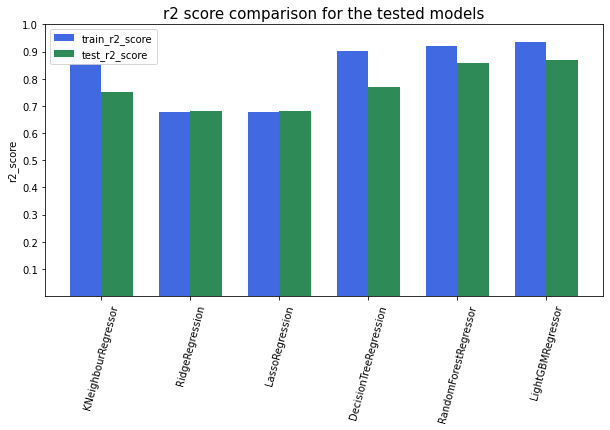

In [94]:
fig = plt.figure(figsize=(10,5))
plot1 = plt.bar(np.arange(6), model_output_with_KBest.train_r2, 0.35, color='royalblue', label="train_r2_score")
plot2 = plt.bar(np.arange(6) + 0.35, model_output_with_KBest.test_r2, 0.35, color='seagreen', label="test_r2_score")
plt.legend(loc='best')
plt.xticks(np.arange(6) + 0.35 / 2, tuple(model_output_with_KBest.Model.values), rotation=75)
plt.title("r2 score comparison for the tested models", fontsize=15)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel("r2_score")
plt.show()

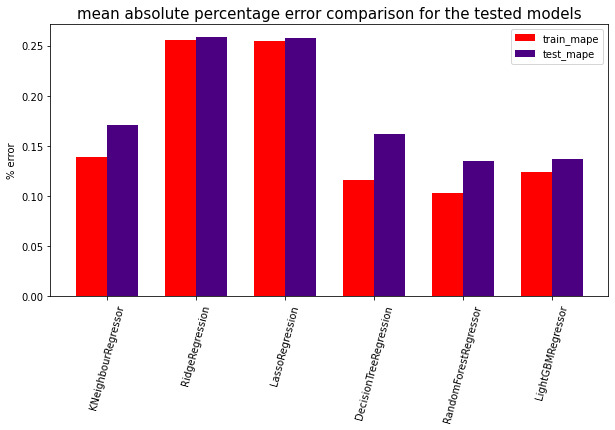

In [96]:
fig = plt.figure(figsize=(10,5))
plot1 = plt.bar(np.arange(6), model_output_with_KBest.train_mape, 0.35, color='red', label="train_mape")
plot2 = plt.bar(np.arange(6) + 0.35, model_output_with_KBest.test_mape, 0.35, color='indigo', label="test_mape")
plt.legend(loc='best')
plt.xticks(np.arange(6) + 0.35 / 2, tuple(model_output_with_KBest.Model.values), rotation=75)
plt.title("mean absolute percentage error comparison for the tested models", fontsize=15)
plt.ylabel("% error")
plt.show()

- I have trained 6 models such as knn, lasso, ridge, decision_tree, random_forest, and lightgbm and we can see that the best performing model is lightgbm.

- The mean absolute percentage error for the model is 0.12 and 0.14 for train and test respectively whereas the r2 scores are 0.93 and 0.87 respectively for train and test.

- I have used monotone to make sure the features which is correlated to the input and has an impact should affect during the model building.

- Linear models such as lasso and ridge are also performing well, but not able to capture the pattern and generating less r2 score. Also, the percentage error is very high as compared to other models.
